# Gifs!

In [1]:
#Downloads and installations
#You may need to run:
    #conda install geopandas
    #conda install pysal
#in command line
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os, glob

In [2]:
#Data downloaded from:
#https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data?no_mobile=true
shapefile = '../data/ZIP_CODE_040114/ZIP_CODE_040114.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)

#set zipcodes as float to match the csvs
gdf.ZIPCODE = gdf['ZIPCODE'].astype('float')

(905410.7560429365, 1075212.5382562785, 112386.35181947275, 280345.454023955)

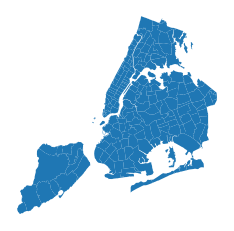

In [3]:
#take a look with no data
gdf.plot().axis('off')

In [4]:
#Load in the census data
census_dat = pd.read_csv('../data/Census_Data_Cleaned.csv')

In [5]:
#Merge together all of the historical coronavirus data
#Merge this also with - census data and shapefile to create one ~highly dimensional~ master dataframe
#Note: this can be done dynamically as the data updates

path = "../zcta-history/"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
    #add a column with the date
    df['Date'] = str(f)[21:26]
    all_df.append(df)
    
all_dates=pd.concat(all_df, sort=True)

#Our list of dates
list_of_dates = all_dates['Date'].unique().tolist()

#Merged with shapefile
merged_shp = gdf.merge(all_dates, left_on='ZIPCODE', right_on='MODZCTA', how = "right")
all_merged = merged_shp.merge(census_dat, left_on='MODZCTA', right_on = "zip_code_tabulation_area")

In [6]:
#Create a column for positive tests per 10,000 residents
all_merged['test_per_10k'] = all_merged['Positive']/(all_merged['pop_total']/10000)

/Users/rebeccayoungerman/opt/anaconda3/envs/cs109b/lib/python3.7/site-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/rebeccayoungerman/opt/anaconda3/envs/cs109b/lib/python3.7/site-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/rebeccayoungerman/opt/anaconda3/envs/cs109b/lib/python3.7/site-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figur

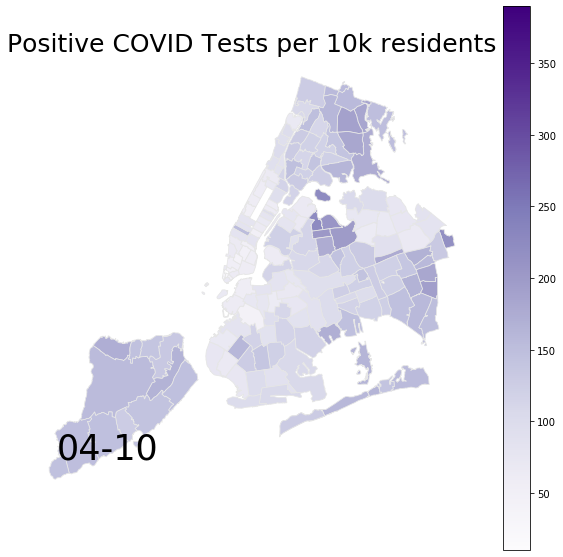

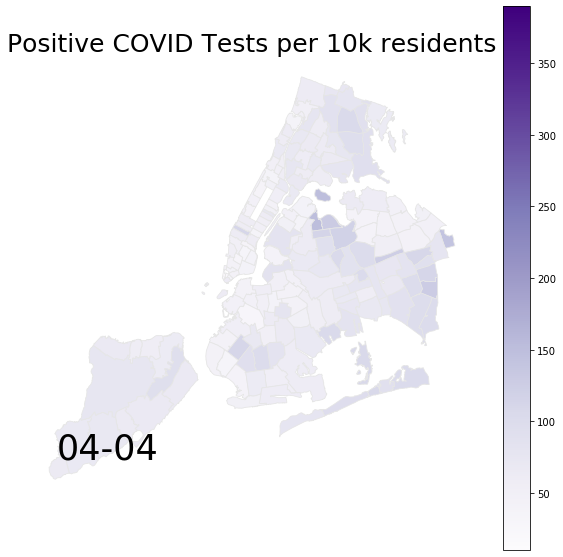

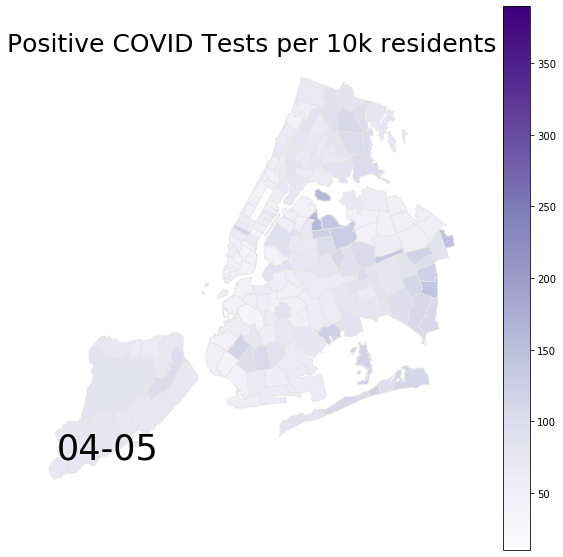

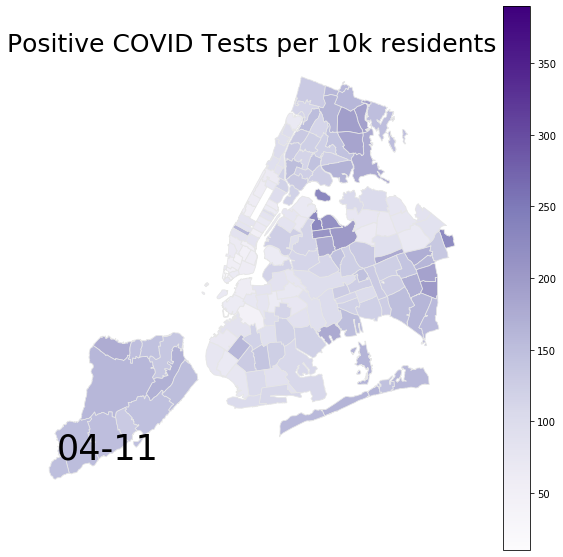

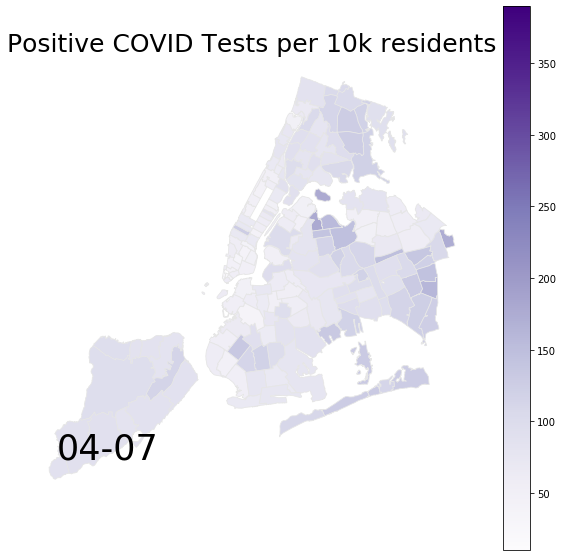

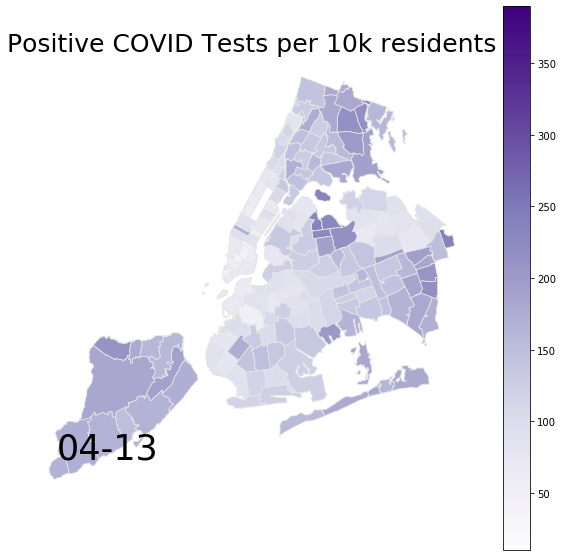

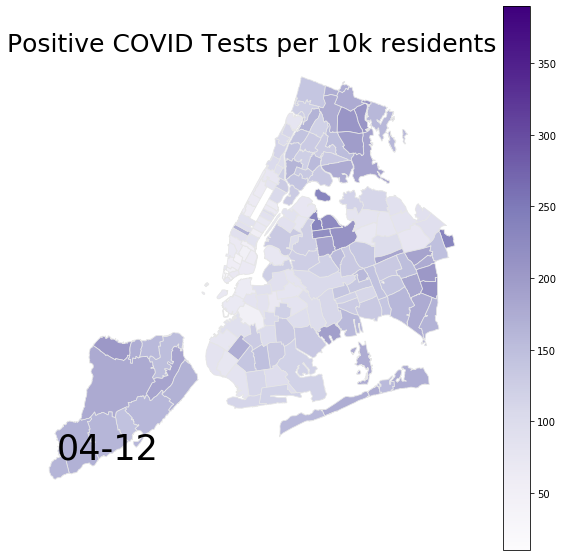

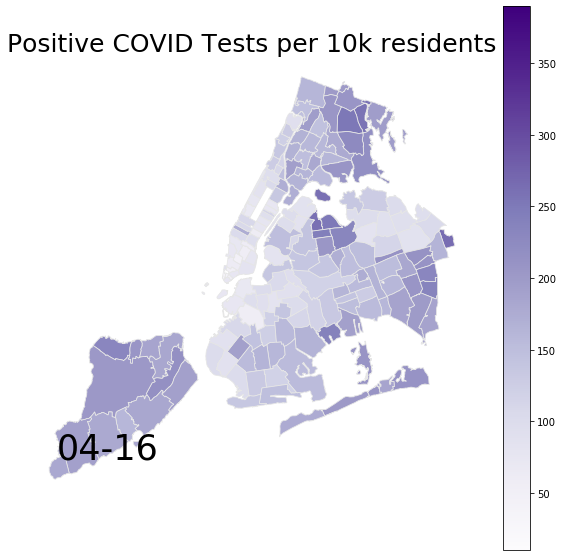

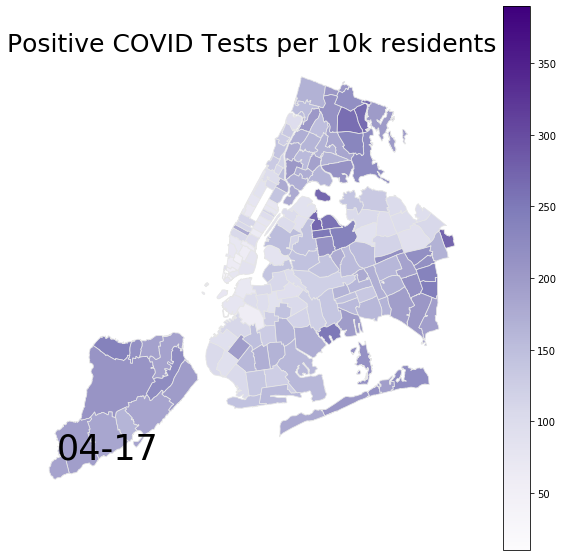

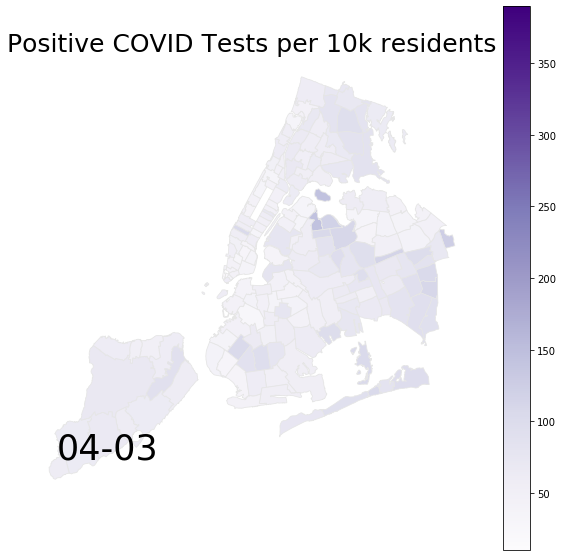

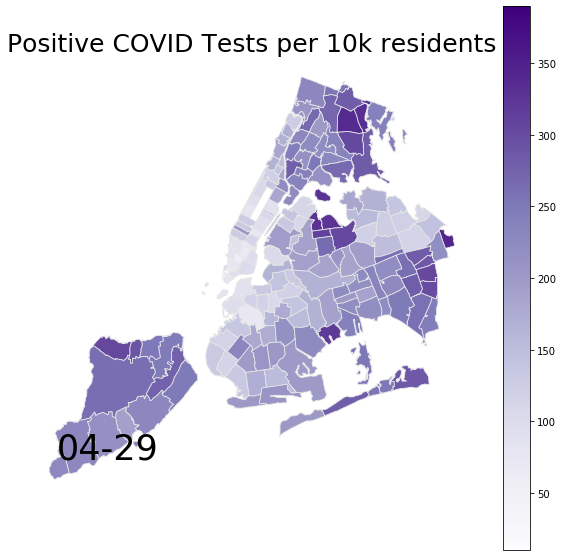

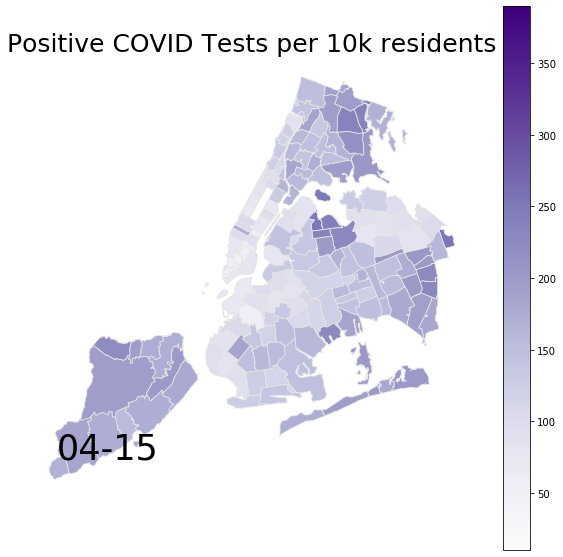

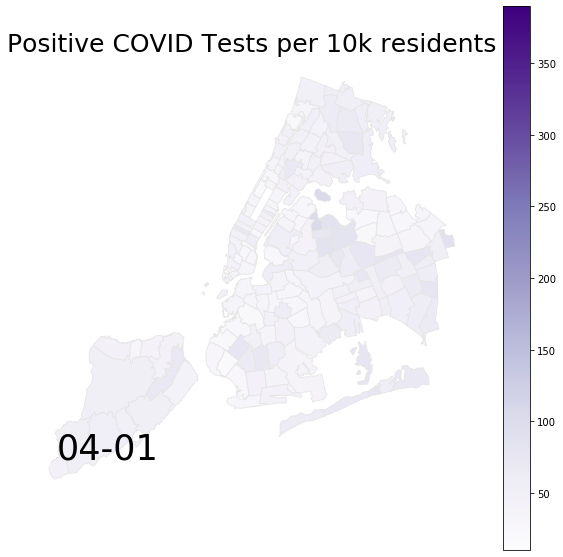

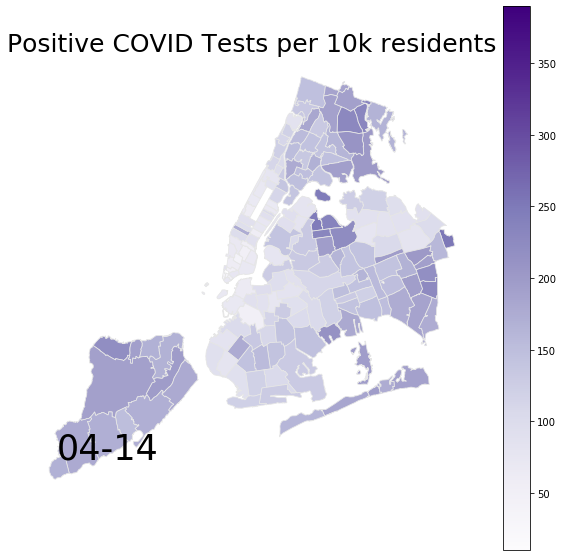

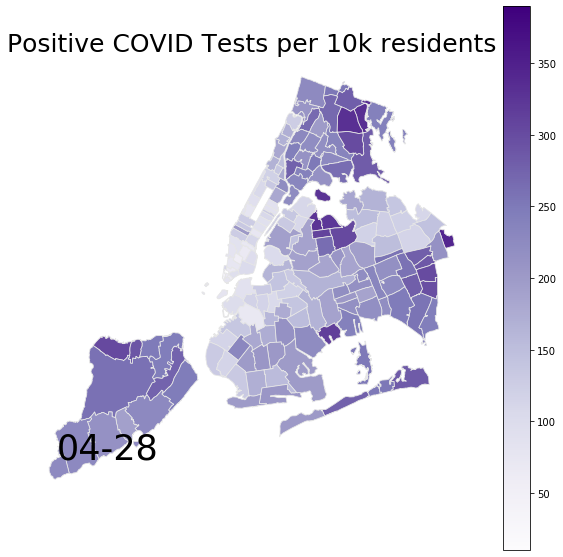

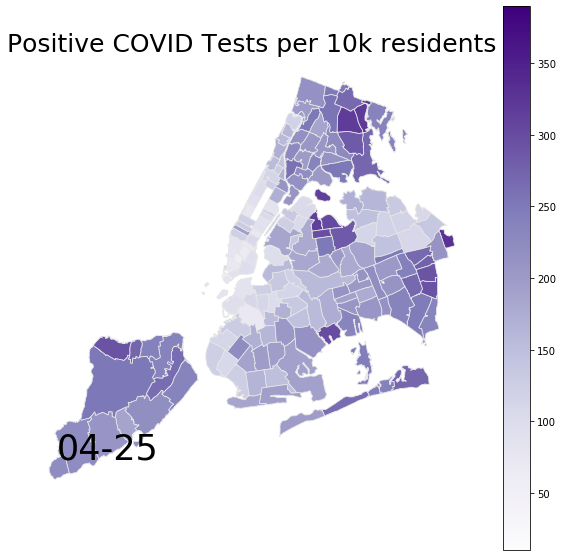

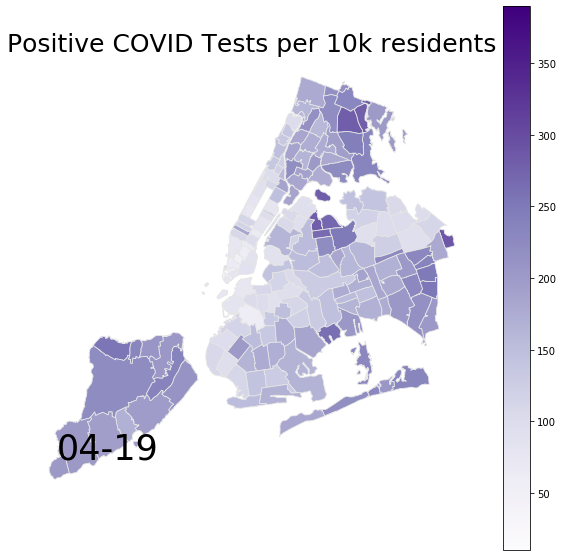

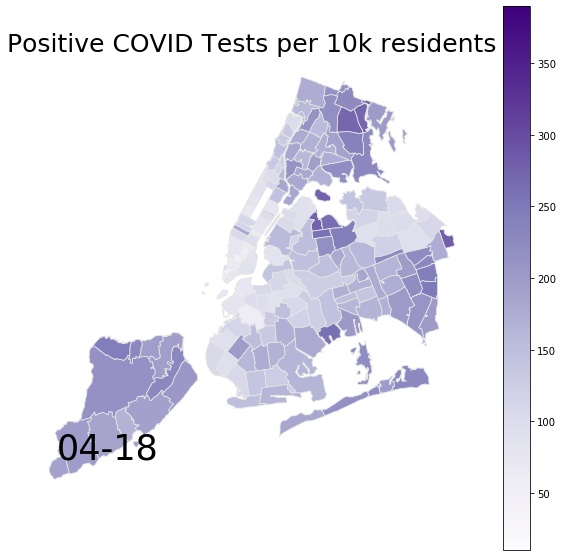

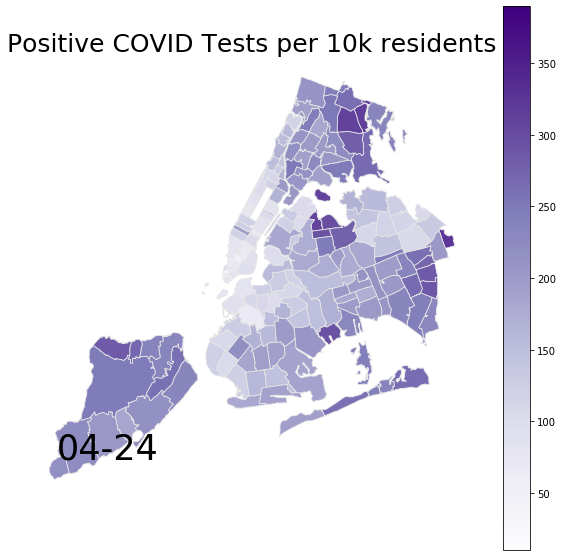

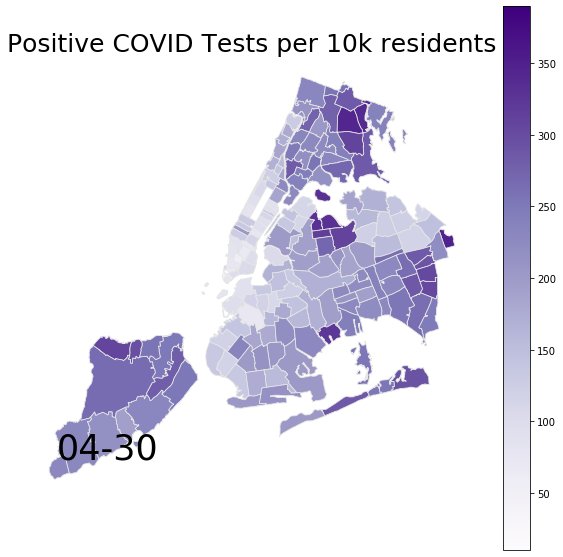

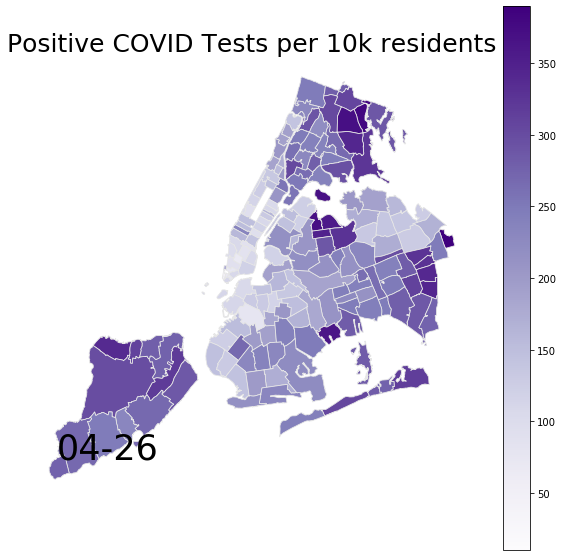

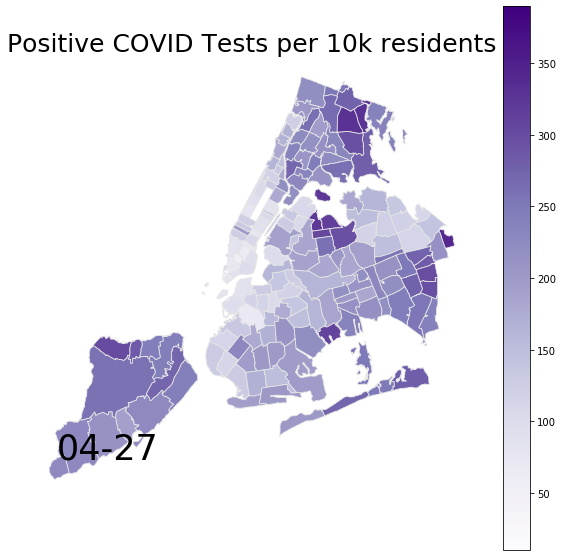

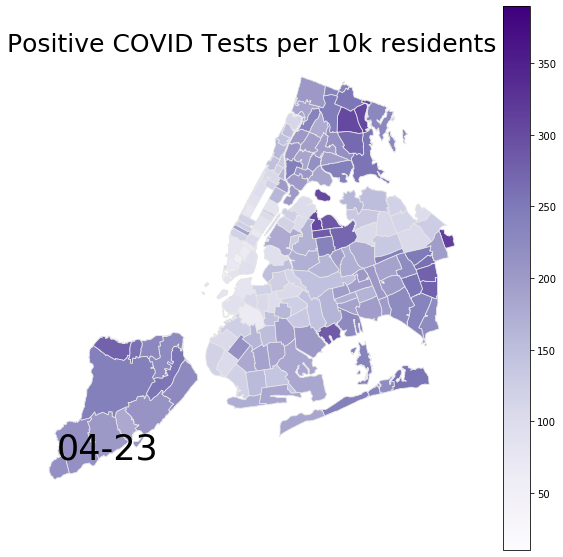

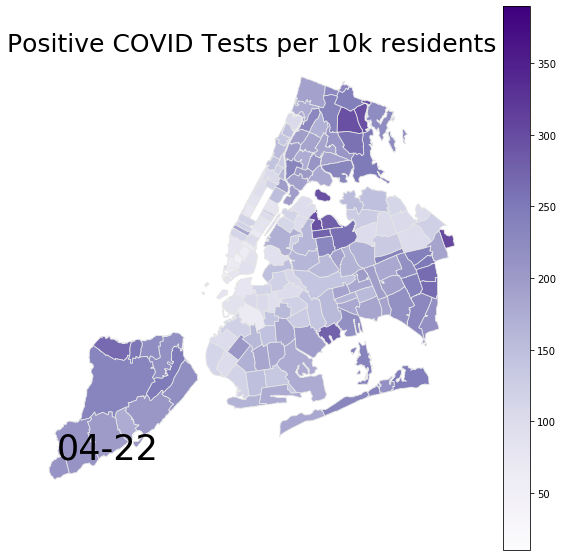

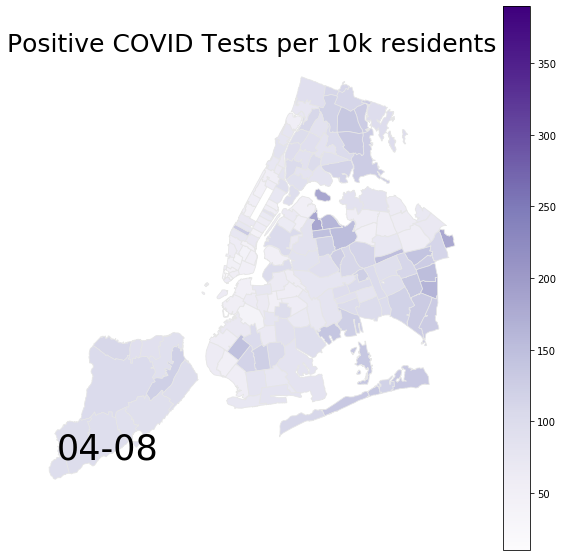

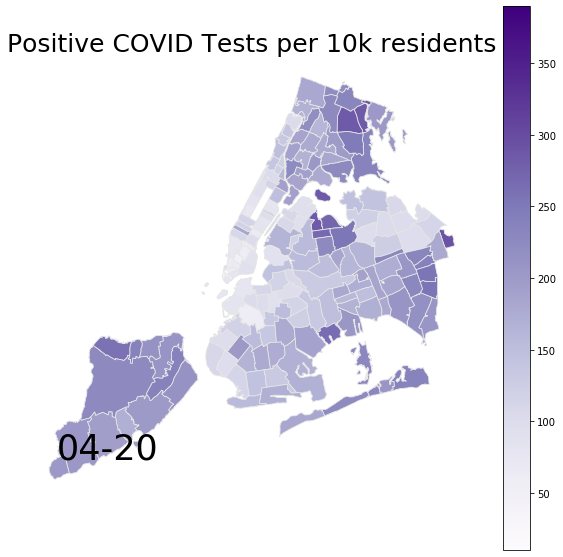

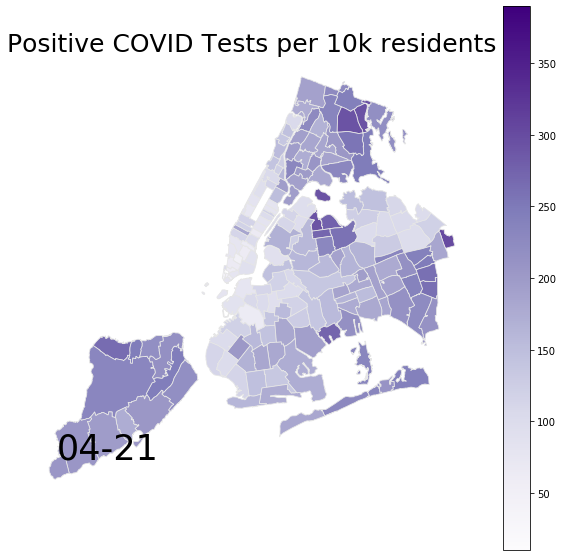

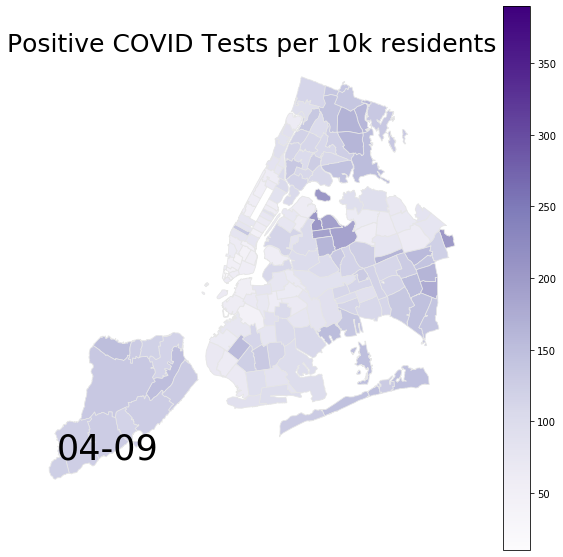

In [7]:
#Generate Plots for every day to make into a gif, save them all to one folder

#change variable according to what column we want to use
variable = 'test_per_10k'

# save all the maps in the charts folder
output_path = 'maps/'

# counter for the for loop
i = 0

# set the min and max range for the choropleth map
vmin, vmax = 10, 390

# start the for loop to create one map per date (list of dates created when we merged csvs)
for date in list_of_dates:
    
    subset = all_merged[all_merged['Date']==date]
    
    
    # create map
    fig = subset.plot(column=variable, cmap='Purples', figsize=(10,10), linewidth=0.8, edgecolor='0.9', vmin=vmin, vmax=vmax, 
                       legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax)) # UDPATE: added plt.Normalize to keep the legend range the same for all maps
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Positive COVID Tests per 10k residents', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})
    
    
    # position the annotation to the bottom left
    fig.annotate(date,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
#     this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, date+'_map.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=100)

Follow instructions given here: https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8
to make a gif!

The instructions are as follows:
 * Navigate to the folder with all pngs in your terminal
 * Run this line to convert to jpgs:
    

* Make sure you have ImageMagick installed (https://imagemagick.org/script/convert.php)
* Check the installation:

* End with:

Arguments: 

-delay 60 will change the amount of time between each image

-loop 0 sets an infinite loop in true gif fashion

-final file (ending in .gif) is our gif file - so be sure to change that if you don't want to overwrite a former gif!

In [25]:
#run this to delete the files if you want to use the same names making your next gif!

# for date in list_of_dates[:-1]:
#     output_path = 'maps/'
#     filepath = os.path.join(output_path, date+'_map.png')
#     filepath = os.path.join(output_path, date+'_map.jpg')
#     os.remove(filepath)
    